# TINDER Project: Exploratory Data Analysis

The following analysis is being done as a mandatory project for certification bloc 2 (Machine Learning Engineer at Jedha).

In the scope of the project:

Given a dataset with information gathered from participants of some experimental speed dating events from 2002-2004 and a text document explaining the abbreviations used in the dataset, the exploratory data analysis is to be conducted. The objective of this analysis is to understand profoundly the data, uncover and visualize potential corelations between different factors that might help to determine what makes people interested into each other to go on a second date together.

Here are the steps that will follow:

1. Initial data loading, analysis and cleaning with the use of adequate libraries
2. Data visualisation with the use of relevant libraries 
3. Detailed data analysis with the focus on the below points:

        * What are the least desirable attributes in a male partner? Does this differ for female partners?
        * How important do people think attractiveness is in potential mate selection vs. its real impact?
        * Are shared interests more important than a shared racial background?
        * Can people accurately predict their own perceived value in the dating market?
        * In terms of getting a second date, is it better to be someone's first speed date of the night or their last?
4. Conclusions and interpretations on how the statistics and visualisations are relevant to why people agree to a second date


# 1. Initial data loading, analysis and cleaning with the use of adequate libraries

In [1]:
# Setting up the environment
import pandas as pd
pd.options.display.max_rows = 999
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
# Loading the data and displaying the first 5 rows
df=pd.read_csv("../data/Speed_Dating_Data.csv", encoding="latin1")

display(df.head(5))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [3]:
# Displaying the last 2 rows of the dataframe
display(df.tail(2))

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
8376,552,22.0,1,44,2,21,22,3,10.0,16,21,529.0,0,0.62,0,22.0,4.0,10.0,25.0,25.0,10.0,10.0,20.0,1,5.0,7.0,5.0,5.0,3.0,6.0,6.0,4.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it...,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,4.0,6.0,5.0,4.0,NaN,5.0,5.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8377,552,NaN,1,44,2,21,22,2,10.0,15,22,530.0,0,0.01,0,22.0,4.0,20.0,20.0,10.0,15.0,5.0,30.0,1,8.0,8.0,7.0,7.0,7.0,7.0,8.0,5.0,2.0,25.0,Climate Dynamics,18.0,"Ecole Normale Suprieure, Paris",NaN,NaN,2.0,1.0,1.0,France,"78,110",NaN,1.0,2.0,1.0,assistant master of the universe (otherwise it...,15.0,8.0,2.0,5.0,10.0,10.0,10.0,7.0,1.0,9.0,8.0,3.0,7.0,9.0,10.0,10.0,7.0,3.0,10.0,NaN,70.0,0.0,15.0,15.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,10.0,50.0,0.0,0.0,30.0,0.0,20.0,8.0,7.0,6.0,7.0,7.0,9.0,7.0,10.0,5.0,9.0,0,3.0,7.0,6.0,4.0,8.0,1.0,4.0,5.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,70.0,0.0,15.0,10.0,0.0,5.0,70.0,0.0,15.0,10.0,0.0,5.0,80.0,0.0,5.0,5.0,0.0,10.0,50.0,5.0,10.0,20.0,5.0,10.0,9.0,3.0,7.0,6.0,9.0,9.0,3.0,9.0,4.0,7.0,2.0,0.0,0.0,NaN,1.0,70.0,0.0,20.0,10.0,0.0,0.0,70.0,0.0,20.0,10.0,0.0,0.0,80.0,0.0,10.0,0.0,0.0,10.0,50.0,5.0,10.0,20.0,10.0,5.0,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [4]:
# Checking the column names
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [5]:
# Checking the shape of the dataframe
df.shape

(8378, 195)

The data displayed above seem difficult to understand at the first glance. The table contains 8378 rows and 195 columns with enigmatic names that will need some closer look to uncover what they actually mean in practice. For this, the text document delivered together with the data will be of great help. We learn from it the meaning of the columns' names. For example: "iid" means the unique subject number or "age_o" means the age of the partner. This brings valuable insight so as to the actual meaning of different columns so that we can learn about participants of the speed dating event: their gender distribution, their age, social background, the importance of certain features that they seek in the future potential partner etc.

In [6]:
# Let's get some basic statistics on the numerical columns

df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8277.000000,1800.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,6489.000000,6489.000000,6489.000000,6489.000000,6489.000000,6467.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,4906.000000,4906.000000,4906.000000,4906.000000,4906.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4096.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,7463.000000,7463.000000,7433.000000,1984.000000,1955.000000,1984.000000,1984.000000,1955.000000,1974.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2

In [7]:
# Checking for missing values
display(df.isna().sum())

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

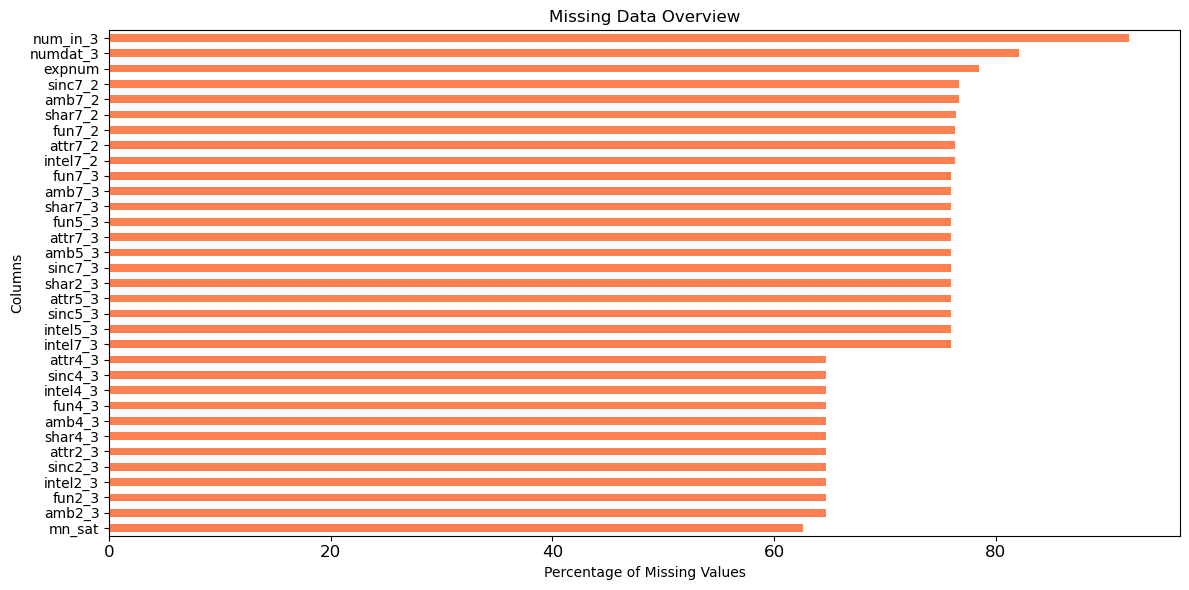

In [8]:
# Visualizing missing values with Seaborn
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

plt.figure(figsize=(12, 6))
missing_percent[missing_percent > 60].sort_values().plot(kind="barh", color="coral")

plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Data Overview")

# Adjust label formatting
plt.xticks(fontsize=12)  # Change font size of x-axis
plt.yticks(fontsize=10, rotation=0)  # Make y-axis text readable
plt.tight_layout()  # Adjust spacing to prevent overlap

plt.show()

The missing values analysis shows that most of the data missing concerns the columns with the follow up data collected from participants after the speed dating event, ie at the "Time 2" (the day after the event) and "Time 3" (3-4 weeks after the event), like for example: numdat_3 (numdat_3: How many of your matches have you been on a date with so far?). 

Therefore the further analysis of this follow up doesn't seem representative for the group of participants analysed. It would be more meaningful to focus on the data gathered before and during the event to understand the composition of the group, their reasons to participate as well as the features that lead the participants to get a "match" with a participant of the opposite sex. 

Let's try to narrow down the number of columns in order to focus the relevant data about participants themeselves and their feedback gathered during the event. This might bring a solid knowledge to draw conclusions.

In [9]:
# Drop columns where missing values > 60%
threshold = 0.6 # 60% missing data threshold
df_1 = df.loc[:, df.isnull().mean() < threshold]
missing_percent = df.isnull().mean()
dropped_cols = missing_percent[missing_percent > threshold].index
print("Dropped Columns:", list(dropped_cols))
print(len(dropped_cols))

Dropped Columns: ['mn_sat', 'expnum', 'attr7_2', 'sinc7_2', 'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'numdat_3', 'num_in_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3', 'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3']
33


In [10]:
# Checking the number of columns after dropping those with over 60% of the values missing
df_1.shape

(8378, 162)

In [11]:
# Checking for the missing values in the remaining columns
display(df_1.isna().sum())

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      79
reading       

The additional check of missing values after cutting down the number of columns by 33, shows that there are still many columns incomplete. This time we are going to keep them but finding strategies to fill in the missing values.

In [12]:
# Let's see which columns are numerical so as to deal with the missing values in a more targeted way
print(df_1.select_dtypes(include=['number']).columns)

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr3_3',
       'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3'],
      dtype='object', length=155)


In [13]:
# The missing values in numerical columns might be replaced by the median values of the respective columns

# Replacing the missing numeric values with the median values
df_1.loc[:, df_1.select_dtypes(include=['number']).columns] = df_1.select_dtypes(include=['number']).apply(lambda x: x.fillna(x.median()))

In [14]:
## Let's see now the categorical columns and deal with the missing values
print(df_1.select_dtypes(include=['object']).columns)

Index(['field', 'undergra', 'tuition', 'from', 'zipcode', 'income', 'career'], dtype='object')


In [15]:
# For the categorical columns, we will replace the missing values with the mode of the respective columns
df_1.loc[:, df_1.select_dtypes(include=['object']).columns] = df_1.select_dtypes(include=['object']).apply(lambda x: x.fillna(x.mode()[0]))

In [16]:
# Final check for any remaining missing values
print("Total missing values after cleaning:", df_1.isna().sum().sum())
display(df_1.isna().sum())

Total missing values after cleaning: 0


iid         0
id          0
gender      0
idg         0
condtn      0
wave        0
round       0
position    0
positin1    0
order       0
partner     0
pid         0
match       0
int_corr    0
samerace    0
age_o       0
race_o      0
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
dec_o       0
attr_o      0
sinc_o      0
intel_o     0
fun_o       0
amb_o       0
shar_o      0
like_o      0
prob_o      0
met_o       0
age         0
field       0
field_cd    0
undergra    0
tuition     0
race        0
imprace     0
imprelig    0
from        0
zipcode     0
income      0
goal        0
date        0
go_out      0
career      0
career_c    0
sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
exphappy    0
attr1_1     0
sinc1_1     0
intel1_1    0
fun1_1      0
amb1_1

## Creating Different Datasets for Different Types of Analysis

For methodological accuracy, we need to distinguish between:
- **Individual-level analysis**: Demographics, personal preferences, self-assessment (use unique individuals)
- **Event-level analysis**: Match success, interaction outcomes (use all speed dating events)

This prevents bias from people who participated in more rounds being over-represented in individual characteristics.

In [17]:
# Create a person-level dataset (one row per unique individual)
# This removes duplicate individuals and keeps their first appearance
df_people = df_1.drop_duplicates('iid').copy()

print(f"Event-level dataset (df_1): {df_1.shape[0]} speed dating events")
print(f"Person-level dataset (df_people): {df_people.shape[0]} unique individuals")
print(f"Average number of speed dates per person: {df_1.shape[0] / df_people.shape[0]:.1f}")

# Keep df_1 for event-level analyses (match success, etc.)
# Use df_people for individual-level analyses (demographics, preferences, etc.)

Event-level dataset (df_1): 8378 speed dating events
Person-level dataset (df_people): 551 unique individuals
Average number of speed dates per person: 15.2


**When to use each dataset:**
- **`df_people`** (person-level): Demographics, personal preferences, self-assessment, individual characteristics
- **`df_1`** (event-level): Match success rates, partner ratings, "what leads to a second date" questions

This methodological distinction ensures that individuals who participated in more rounds don't get overrepresented in analyses about individual characteristics.

# 2. Data visualisation with the use of visualization libraries

Now that the dataset is cleaned, it will be easier to run an analysis of the participants, their gender, age and social background or origin. We will also look at their preferences so as to finding a match.

In [18]:
# Checking the exact number of participants (using person-level data)
display(len(df_people["iid"].unique()))

551

In [19]:
# Grouping the "gender" unique by "iid" unique gives the exact number of men and women participating in the event
df_people.groupby("gender")["iid"].nunique()

gender
0    274
1    277
Name: iid, dtype: int64

In [20]:
# # Grouping the "gender" unique by value counts gives the  number of men and women participating in rounds; 
# however all of them participate is many rounds so they are all counted several times
display(df_1.gender.value_counts())

gender
1    4194
0    4184
Name: count, dtype: int64

In [21]:
# For more understandable plotting, changing the type of data in the "gender" column
df_1 = df_1.assign(Gender=df_1['gender'].apply(lambda x: "Women" if x==0 else "Men" ))
df_people = df_people.assign(Gender=df_people['gender'].apply(lambda x: "Women" if x==0 else "Men" ))

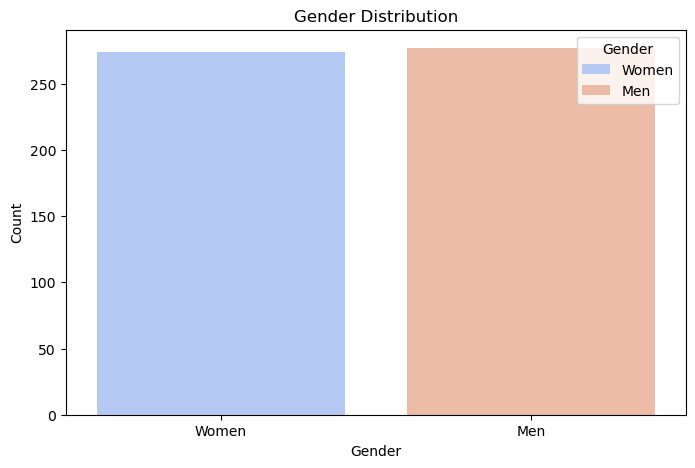

In [22]:
# Preparing a graphical representation of distribution by "Gender" with Seaborn

# Set figure size
plt.figure(figsize=(8,5))

# Plot gender distribution using Seaborn (person-level data)
sns.countplot(data=df_people, x="Gender", hue="Gender", legend=True, palette="coolwarm")

# Add title & labels
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

Interpretation:
The above countplot visualizes the number of male and female participants and we can clearly see the it is a perfect balance between them.

In [23]:
# Looking closer at the average age of participants with distinction by gender (person-level data)
df_people.groupby("Gender")["age"].mean()

Gender
Men      26.581227
Women    26.124088
Name: age, dtype: float64

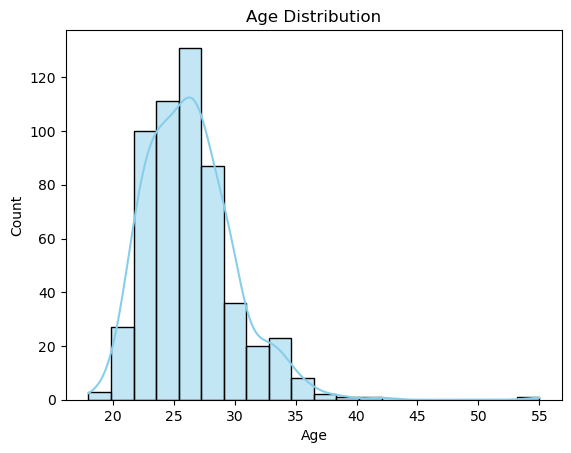

In [24]:
# Plot Age Distribution with Seaborn (person-level data)
sns.histplot(df_people['age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

The above figures and plot show that the average age of participants is 26 years old and it varies mostly between 20 and 35 years olds. Clearly, the participants are rather young almost equally spread between male and female.

In [25]:
# Let's focus on the ethicity of the participants (person-level data)

df_people['race'].unique()
df_people['race'].value_counts()

race
2.0    310
4.0    136
3.0     42
6.0     37
1.0     26
Name: count, dtype: int64

In [26]:
# For better understanding, changing the column names for both datasets.
race_mapping = lambda x: ("Black/African American" if x == 1 else
                         "European/Caucasian-American" if x == 2 else
                         "Latino/Hispanic American" if x == 3 else
                         "Asian/Pacific Islander/Asian-American" if x == 4 else
                         "Native American" if x == 5 else
                         "other" if x == 6 else
                         "no data")

df_people = df_people.assign(race=df_people['race'].apply(race_mapping))
df_1 = df_1.assign(race=df_1['race'].apply(race_mapping))

In [27]:
df_people['race'].unique()
df_people['race'].value_counts()

race
European/Caucasian-American              310
Asian/Pacific Islander/Asian-American    136
Latino/Hispanic American                  42
other                                     37
Black/African American                    26
Name: count, dtype: int64

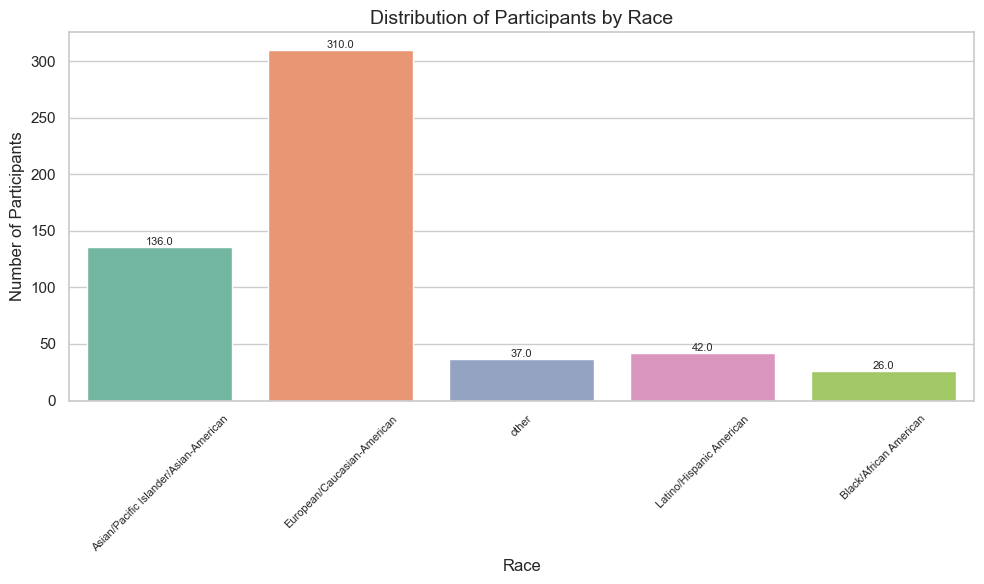

In [28]:
# Visualizing the ethnical origin of participants with Seaborn

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Use 'hue' to avoid the FutureWarning and suppress the legend (person-level data)
ax = sns.countplot(data=df_people, x='race', hue='race', palette='Set2', legend=False)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=8)

# Customize titles and labels
ax.set_title('Distribution of Participants by Race', fontsize=14)
ax.set_xlabel('Race', fontsize=12)
ax.set_ylabel('Number of Participants', fontsize=12)

# Set font size of x-axis tick labels
ax.tick_params(axis='x', labelsize=8, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


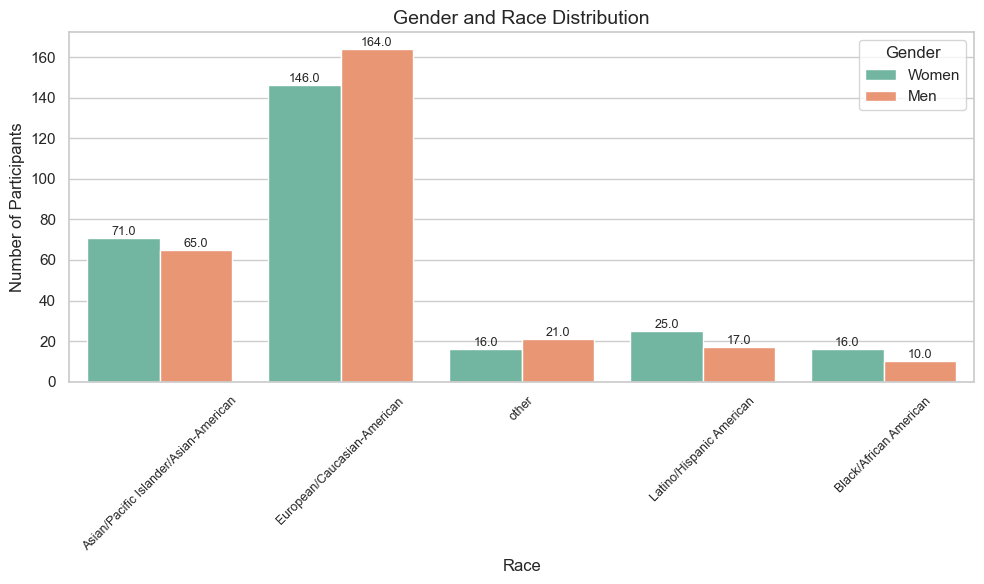

In [30]:
# Visualizing the ethnical origin of participants with distinction on gender

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Use countplot with 'race' on x-axis and 'Gender' as hue (person-level data)
ax = sns.countplot(data=df_people, x='race', hue='Gender', palette='Set2')

# Customize titles and labels
ax.set_title('Gender and Race Distribution', fontsize=14)
ax.set_xlabel('Race', fontsize=12)
ax.set_ylabel('Number of Participants', fontsize=12)

# Set font size of x-axis tick labels for readability
ax.tick_params(axis='x', labelsize=9, rotation=45)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


Now that we have an idea about the distribution of gender, age and origin of participants, we may have a closer look at their intentions: why do they participate in speed dating?

In [31]:
# Display unique values and their counts for the 'goal' column (person-level data)
print(df_people['goal'].unique())
print(df_people['goal'].value_counts())

[2. 1. 6. 3. 4. 5.]
goal
1.0    228
2.0    196
3.0     40
5.0     35
6.0     30
4.0     22
Name: count, dtype: int64


In [32]:
# Looking at the intended goal of the participants coded with numbers is not very illustrative
# Let's try recoding goal variable from int to string for both datasets
goal_mapping = lambda x: ("fun night out" if x == 1 else
                         "meet new people" if x == 2 else
                         "get a date" if x == 3 else
                         "looking for serious relationship" if x == 4 else 
                         "to say I dit it" if x == 5 else  
                         "other goal" if x == 6 else
                         "no data")

df_people = df_people.assign(goal=df_people['goal'].apply(goal_mapping))
df_1 = df_1.assign(goal=df_1['goal'].apply(goal_mapping))

In [33]:
# Display unique values and their counts for the updated 'goal' column (person-level data)
print(df_people['goal'].unique())
print(df_people['goal'].value_counts())

['meet new people' 'fun night out' 'other goal' 'get a date'
 'looking for serious relationship' 'to say I dit it']
goal
fun night out                       228
meet new people                     196
get a date                           40
to say I dit it                      35
other goal                           30
looking for serious relationship     22
Name: count, dtype: int64


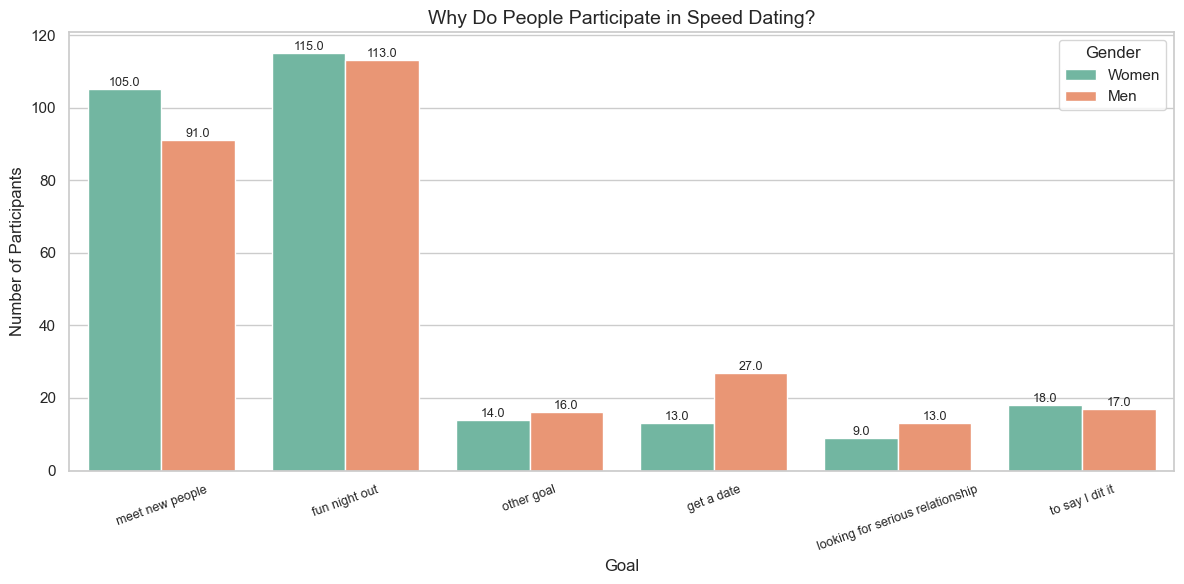

In [35]:
# Visualizing the goals of participants with Seaborn
# Set the aesthetic style
sns.set(style="whitegrid")

# Define custom order for the 'goal' categories
goal_order = [
    'meet new people', 
    'fun night out', 
    'other goal', 
    'get a date',
    'looking for serious relationship',
    'to say I dit it'
]

# Create the figure
plt.figure(figsize=(12, 6))

# Use countplot with 'goal' on x-axis and 'Gender' as hue (person-level data)
ax = sns.countplot(data=df_people, x='goal', hue='Gender', order=goal_order, palette='Set2')

# Customize titles and labels
ax.set_title('Why Do People Participate in Speed Dating?', fontsize=14)
ax.set_xlabel('Goal', fontsize=12)
ax.set_ylabel('Number of Participants', fontsize=12)

# Reduce font size of x-axis tick labels for readability
ax.tick_params(axis='x', labelsize=9)

# Rotate x-axis labels if needed for clarity
plt.xticks(rotation=20)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

# Show the plot
plt.tight_layout()
plt.show()


The above visualizations give us some more insights at what motivates these people to join speed dating events. It's not necessarily the will to get a date, it may be just for fun or to meet new people.

Let's continue the analysis and try to find out if origin or the goal of participating in the speed dating event influence getting a "match"?

In [36]:
# First, let's have a look at the relation of the origin (race) and getting a "match"
df_1.groupby("samerace")["match"].mean()

samerace
0    0.160806
1    0.170688
Name: match, dtype: float64

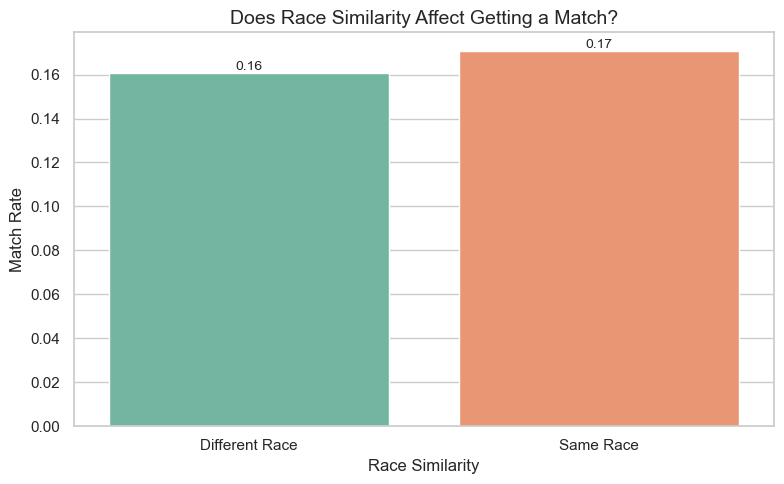

In [37]:
# Visualizing the influence of the ethnical origin on getting a match with Seaborn

# Prepare the data
match_rates = df_1.groupby("samerace")["match"].mean().reset_index()
match_rates["samerace"] = match_rates["samerace"].map({0: "Different Race", 1: "Same Race"})

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(8, 5))

# Use 'hue' to assign color and suppress legend
ax = sns.barplot(data=match_rates, x="samerace", y="match", hue="samerace", palette="Set2", legend=False)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)

# Customize titles and labels
ax.set_title("Does Race Similarity Affect Getting a Match?", fontsize=14)
ax.set_xlabel("Race Similarity", fontsize=12)
ax.set_ylabel("Match Rate", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



Conclusion: sharing the same ethnical origin does not significantly influence getting a "match".

In [38]:
# Let's have a look which of the intended goals of participation influences most getting a match?
df_1.groupby("goal")["match"].mean()

goal
fun night out                       0.170169
get a date                          0.158479
looking for serious relationship    0.169435
meet new people                     0.161436
other goal                          0.147971
to say I dit it                     0.166667
Name: match, dtype: float64

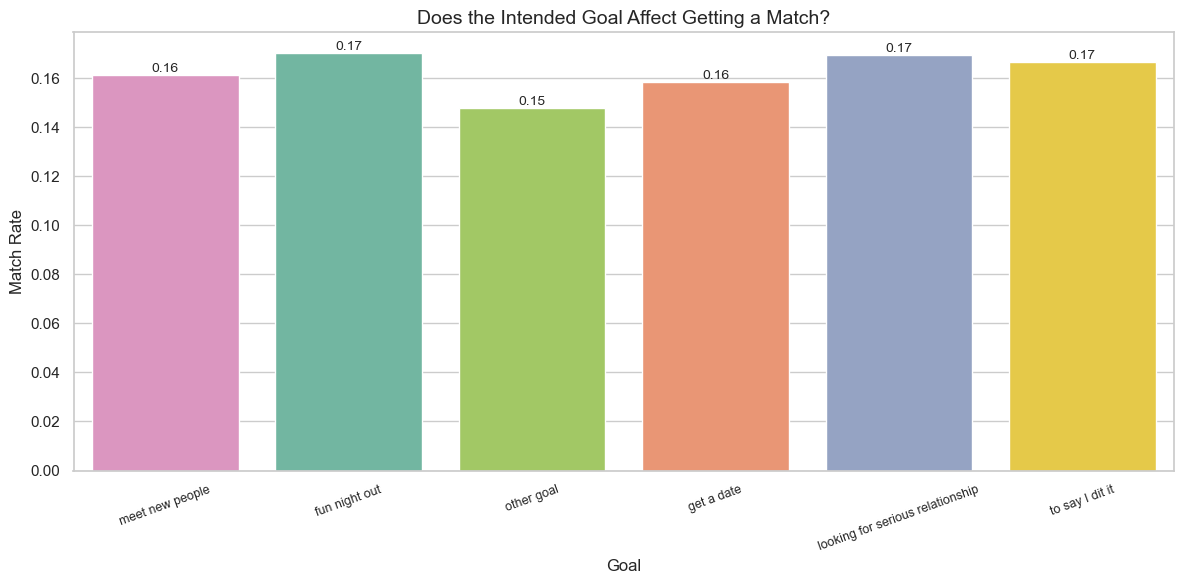

In [39]:
# Visualizing the influence of the intended goal on getting a match with Seaborn

# Prepare the data for plotting
match_rates = df_1.groupby("goal")["match"].mean().reset_index()

# Define custom order for clarity
goal_order = [
    "meet new people",
    "fun night out",
    "other goal",
    "get a date",
    "looking for serious relationship",
    "to say I dit it"
]

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Use hue to avoid FutureWarning and suppress legend
ax = sns.barplot(data=match_rates, x="goal", y="match", hue="goal", palette="Set2", order=goal_order, legend=False)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=10)

# Customize titles and labels
ax.set_title("Does the Intended Goal Affect Getting a Match?", fontsize=14)
ax.set_xlabel("Goal", fontsize=12)
ax.set_ylabel("Match Rate", fontsize=12)

# Improve readability of x-axis labels
ax.tick_params(axis='x', labelsize=9)
plt.xticks(rotation=20)

# Show the plot
plt.tight_layout()
plt.show()



Conclusion: by looking at the match rate distribution with respect to different motives of participation in speed dating events, we can't really identify any particular one that would lead to a stronger match rate.

Let's look at the matches obtained by participants : who gets most of them?

In [40]:
# Checking the distribution of matches obtained by participants with respect to gender
df_1.groupby(["Gender"])["match"].mean()

Gender
Men      0.164521
Women    0.164914
Name: match, dtype: float64

In [41]:
# Checking the distribution of matches obtained by participants with respect to age
df_1.groupby(["age"])["match"].mean()

age
18.0    0.000000
19.0    0.250000
20.0    0.254545
21.0    0.223368
22.0    0.143511
23.0    0.161074
24.0    0.142526
25.0    0.234170
26.0    0.170124
27.0    0.158640
28.0    0.174263
29.0    0.157895
30.0    0.144599
31.0    0.144000
32.0    0.100000
33.0    0.124224
34.0    0.131579
35.0    0.166667
36.0    0.088889
37.0    0.000000
38.0    0.105263
39.0    0.111111
42.0    0.200000
55.0    0.000000
Name: match, dtype: float64

In [42]:
# Checking the distribution of matches obtained by participants with respect to gender and age
df_1.groupby(["Gender", "age"])["match"].mean()

Gender  age 
Men     18.0    0.000000
        19.0    0.000000
        20.0    0.120000
        21.0    0.277778
        22.0    0.127148
        23.0    0.175711
        24.0    0.149144
        25.0    0.227749
        26.0    0.174447
        27.0    0.160194
        28.0    0.188372
        29.0    0.154696
        30.0    0.157025
        31.0    0.070423
        32.0    0.104575
        33.0    0.111111
        34.0    0.115942
        36.0    0.050000
        37.0    0.000000
        39.0    0.111111
        42.0    0.200000
Women   19.0    0.500000
        20.0    0.366667
        21.0    0.191257
        22.0    0.156593
        23.0    0.149901
        24.0    0.136564
        25.0    0.239560
        26.0    0.166966
        27.0    0.156463
        28.0    0.155063
        29.0    0.162996
        30.0    0.123223
        31.0    0.240741
        32.0    0.087719
        33.0    0.128000
        34.0    0.144578
        35.0    0.166667
        36.0    0.120000
        38.0

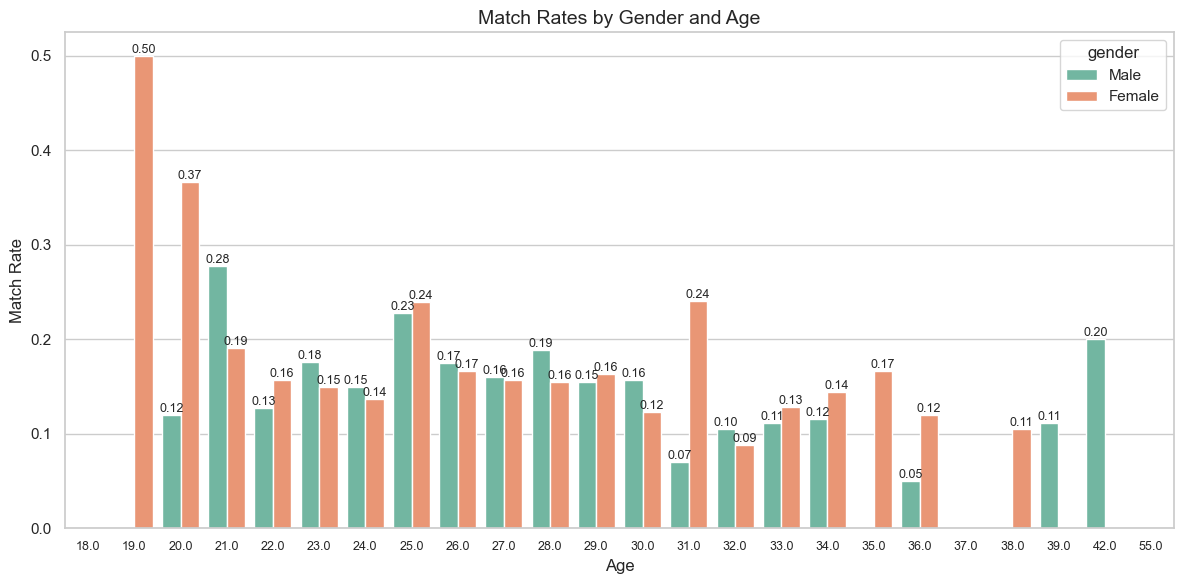

In [43]:
# Visualizing the distribution of matches obtained by participants with respect to gender abd age with Seaborn

# Prepare the data
match_rates = df_1.groupby(["gender", "age"])["match"].mean().reset_index()
match_rates["gender"] = match_rates["gender"].map({0: "Female", 1: "Male"})

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Create grouped bar chart
ax = sns.barplot(data=match_rates, x="age", y="match", hue="gender", palette="Set2")

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

# Customize titles and labels
ax.set_title("Match Rates by Gender and Age", fontsize=14)
ax.set_xlabel("Age", fontsize=12)
ax.set_ylabel("Match Rate", fontsize=12)

# Improve readability of x-axis labels
ax.tick_params(axis='x', labelsize=9)

# Show the plot
plt.tight_layout()
plt.show()


# 3. Detailed data analysis 

In this part of the analysis we will be trying to answer the following questions:

    * What attributes do participants look for in the opposite sex? What attribute is the most/the least desirable ?
    * How important do people think attractiveness is in potential mate selection vs. its real impact?
    * Are shared interests more important than a shared racial background?
    * Can people accurately predict their own perceived value in the dating market?
    * In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

What attributes do participants look for in the opposite sex? What attribute is the most/the least desirable ?

In [44]:
# Renaming personal attributes that participants look for in their partners to more clear names
# Using person-level data for individual preferences

attributes = df_people[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]
attributes.columns = ['Attractive', 'Sincere','Intelligent','Fun','Ambitious','Shared_interests']

attributes_sort = attributes.mean().sort_values(ascending=False)
attributes_sort

Attractive          22.651361
Intelligent         20.168312
Fun                 17.459328
Sincere             17.302051
Shared_interests    11.810490
Ambitious           10.793303
dtype: float64

In [45]:
# Checking the attributes preferred respectively by men and women (person-level data)
df_people.groupby("Gender")[['attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].mean()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
Gender,,,,,,
Men,27.196462,16.392599,19.391841,17.605162,8.840939,10.977329
Women,18.056496,18.221460,20.953285,17.311898,12.767044,12.652774


In [46]:
# Preparing the dataframe for better visualization (person-level data)
mean_preferences = df_people.groupby("Gender")[["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]].mean()

In [47]:
# Transposing the dataframe for better visualization
mean_preferences.T.sort_values(by=["Women", "Men"], ascending=True)

Gender,Men,Women
shar1_1,10.977329,12.652774
amb1_1,8.840939,12.767044
fun1_1,17.605162,17.311898
attr1_1,27.196462,18.056496
sinc1_1,16.392599,18.221460
intel1_1,19.391841,20.953285


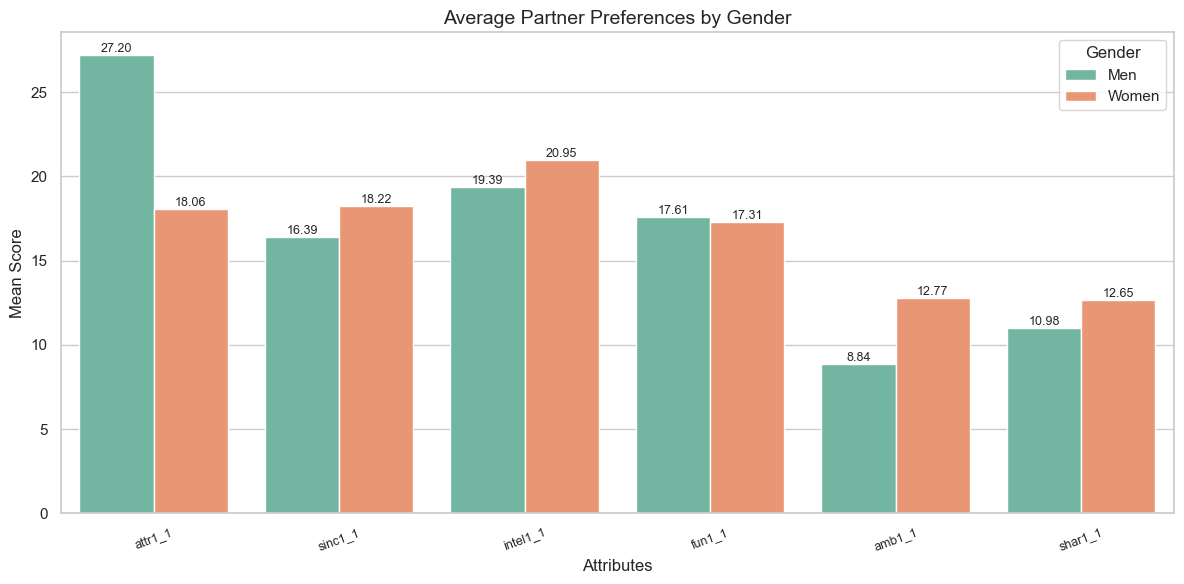

In [48]:
# Visualizing the attributes preferred respectively by men and women
# Transform data for Seaborn
df_sorted = mean_preferences.T.reset_index().melt(id_vars="index", var_name="Gender", value_name="Mean Score")

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Create grouped bar chart
ax = sns.barplot(data=df_sorted, x="index", y="Mean Score", hue="Gender", palette="Set2")

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

# Customize titles and labels
ax.set_title("Average Partner Preferences by Gender", fontsize=14)
ax.set_xlabel("Attributes", fontsize=12)
ax.set_ylabel("Mean Score", fontsize=12)

# Improve readability of x-axis labels
ax.tick_params(axis='x', labelsize=9)
plt.xticks(rotation=20)

# Show the plot
plt.tight_layout()
plt.show()


<span style="font-size:14px;"> Conclusion: Men look mostly for attractive women in speed dating (shared interests or ambitions don't seem to bother them too much) whereas women focus rather on intelligence and sincerity however the attractiveness is also rather important.</span>

How important do people think attractiveness is in potential mate selection vs. its real impact?

We will be searching for the attribute that most of participants think that the opposite sex is looking for.

In [49]:
# Renaming personal attributes that participants think the opposite sex looks for in their partners
# Using person-level data for individual perceptions
guess_of_pref_attributes = df_people[['attr4_1', 'sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1']]
guess_of_pref_attributes.columns = ['Attractive', 'Sincere','Intelligent','Fun','Ambitious','Shared_interests']

guess_of_pref_attributes_sort = guess_of_pref_attributes.mean().sort_values(ascending=False)
guess_of_pref_attributes_sort

Attractive          26.025408
Fun                 15.462795
Intelligent         11.927405
Sincere             10.814882
Shared_interests    10.758621
Ambitious            9.816697
dtype: float64

In [50]:
df_people.groupby("Gender")[['attr4_1', 'sinc4_1','intel4_1','fun4_1','amb4_1','shar4_1']].mean()

,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1
Gender,,,,,,
Men,27.523466,10.588448,11.563177,15.870036,8.256318,10.642599
Women,24.510949,11.043796,12.295620,15.051095,11.394161,10.875912


In [51]:
# Preparing the dataframe for better visualization (person-level data)
mean_guessed_preferences = df_people.groupby("Gender")[["attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]].mean()

In [52]:
# Transposing the dataframe for better visualization
mean_guessed_preferences.T.sort_values(by=["Women", "Men"], ascending=True)

Gender,Men,Women
shar4_1,10.642599,10.875912
sinc4_1,10.588448,11.043796
amb4_1,8.256318,11.394161
intel4_1,11.563177,12.295620
fun4_1,15.870036,15.051095
attr4_1,27.523466,24.510949


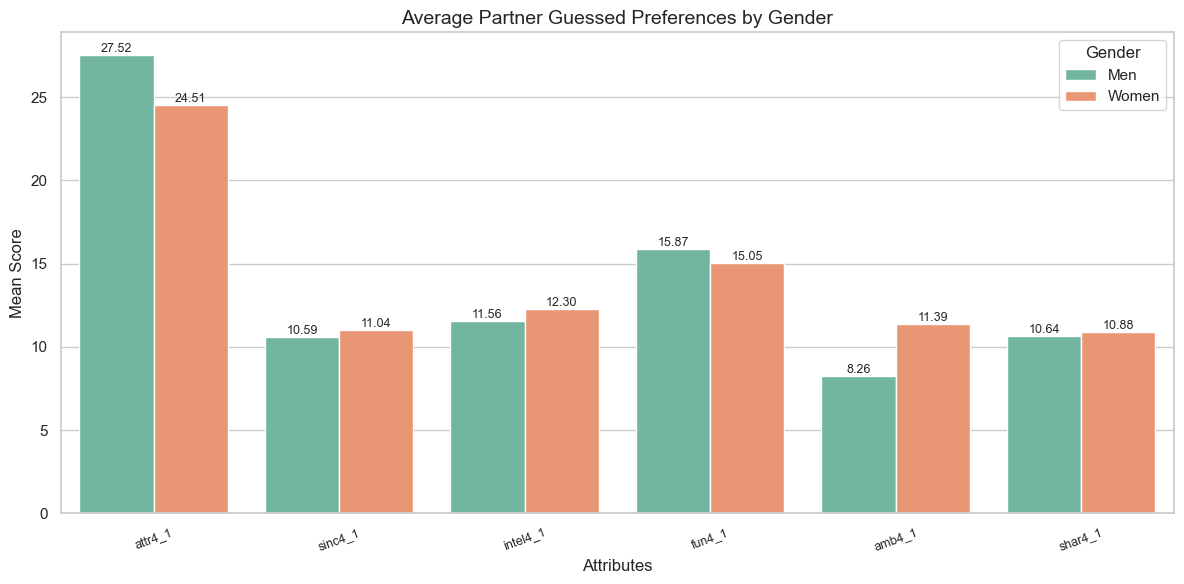

In [53]:
# Visualizing the attributes participants think are preferred respectively by men and women

# Transform data for Seaborn
df_sorted = mean_guessed_preferences.T.reset_index().melt(id_vars="index", var_name="Gender", value_name="Mean Score")

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Create grouped bar chart
ax = sns.barplot(data=df_sorted, x="index", y="Mean Score", hue="Gender", palette="Set2")

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

# Customize titles and labels
ax.set_title("Average Partner Guessed Preferences by Gender", fontsize=14)
ax.set_xlabel("Attributes", fontsize=12)
ax.set_ylabel("Mean Score", fontsize=12)

# Improve readability of x-axis labels
ax.tick_params(axis='x', labelsize=9)
plt.xticks(rotation=20)

# Show the plot
plt.tight_layout()
plt.show()


<span style="font-size:14px;"> Conclusion: Both women and men think that the opposite sex looks for an attractive and fun partner.</span>

Let's see what is more decisive for the participants between the same racial backgroud and shared interests.

In [54]:
# Comparison of the importance attributed to the same racial background (imprace) vs shared interests (shar1_1)

imprace_vs_shar1_1 = df_1[['imprace','shar4_1']]
imprace_vs_shar1_1.columns = ['Importance of the same ethnic background','Shared_interests']

imprace_vs_shar1_1_sort = imprace_vs_shar1_1.mean().sort_values(ascending=False)
imprace_vs_shar1_1_sort


Shared_interests                            10.783361
Importance of the same ethnic background     3.777393
dtype: float64

In [55]:
df_1.groupby("Gender")[['imprace','shar1_1']].mean()

,imprace,shar1_1
Gender,,
Men,3.462327,10.993174
Women,4.093212,12.664233


In [56]:
# Preparing the dataframe for better visualization
mean_race_interests = df_1.groupby("Gender")[["imprace", "shar1_1"]].mean()

In [57]:
# Transposing the dataframe for better visualization
mean_race_interests.T.sort_values(by=["Women", "Men"], ascending=True)

Gender,Men,Women
imprace,3.462327,4.093212
shar1_1,10.993174,12.664233


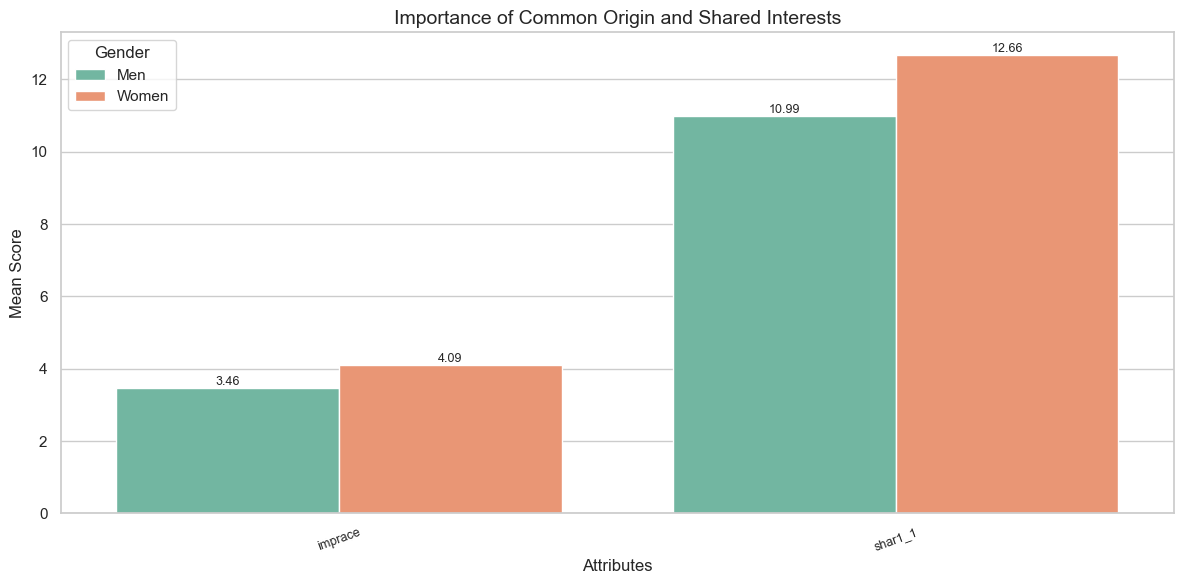

In [58]:
# Visualizing the importance attributed to the same racial background vs shared interests
# Transform data for Seaborn
df_sorted = mean_race_interests.T.reset_index().melt(id_vars="index", var_name="Gender", value_name="Mean Score")

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(12, 6))

# Create grouped bar chart
ax = sns.barplot(data=df_sorted, x="index", y="Mean Score", hue="Gender", palette="Set2")

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.2f}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=9)

# Customize titles and labels
ax.set_title("Importance of Common Origin and Shared Interests", fontsize=14)
ax.set_xlabel("Attributes", fontsize=12)
ax.set_ylabel("Mean Score", fontsize=12)

# Improve readability of x-axis labels
ax.tick_params(axis='x', labelsize=9)
plt.xticks(rotation=20)

# Show the plot
plt.tight_layout()
plt.show()


Conclusion: being of the same ethnical origin doesn't seem to have a huge importance for participants. Having shared interests seems way more crucial for them while searching a partner for a date.

Let's see if people can accurately predict their own perceived value in the "dating market".

In [59]:
# Select attributes for self vs. others' evaluation
self_evaluated_attributes = ["attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]
peer_evaluated_attributes = ["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]

# Compute average scores
self_eval = df[self_evaluated_attributes].mean().values
peer_eval = df[peer_evaluated_attributes].mean().values



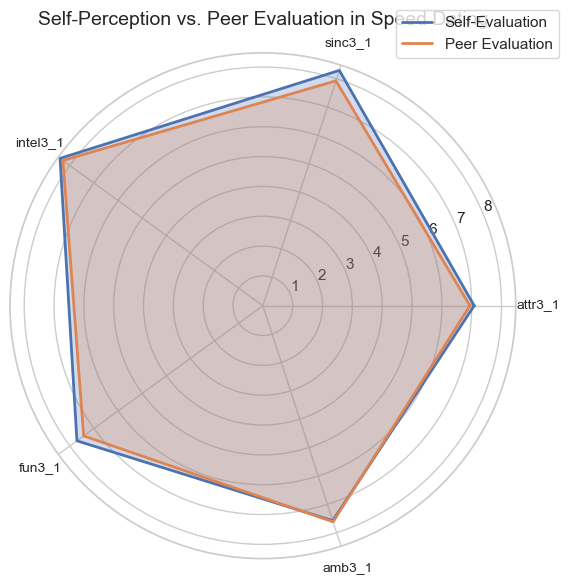

In [60]:
# Visualizing self-perception vs. peer evaluation with a radar chart

# Prepare the data
radar_df = pd.DataFrame({
    "Feature": self_evaluated_attributes,
    "Self-Evaluation": self_eval,
    "Peer Evaluation": peer_eval
})

# Melt the DataFrame for easier handling
radar_df = radar_df.melt(id_vars="Feature", var_name="Evaluation Type", value_name="Score")

# Get unique features and evaluation types
features = radar_df["Feature"].unique()
types = radar_df["Evaluation Type"].unique()
num_vars = len(features)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Initialize plot
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

# Plot each evaluation type
for eval_type in types:
    values = radar_df[radar_df["Evaluation Type"] == eval_type]["Score"].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, label=eval_type, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

# Set the feature labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=10)

# Set title and legend
ax.set_title("Self-Perception vs. Peer Evaluation in Speed Dating", fontsize=14, pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.tight_layout()
plt.show()


In [61]:
# Let's see how participants evaluate themselves vs how they are evaluated by others with distinction by gender

# Group by gender and compute mean
mean_by_gender = df.groupby("gender")[self_evaluated_attributes + peer_evaluated_attributes].mean()

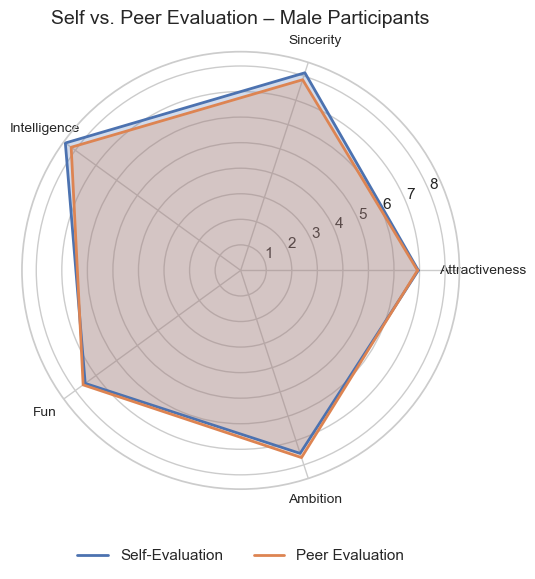

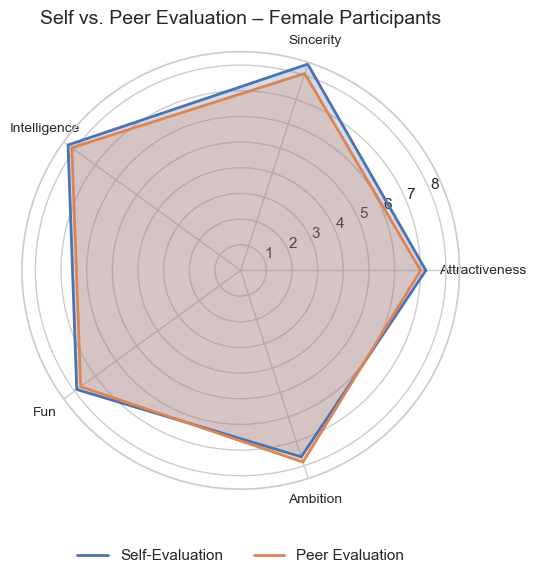

In [62]:
# Define attributes
self_evaluated_attributes = ["attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]
peer_evaluated_attributes = ["attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1"]
labels = ["Attractiveness", "Sincerity", "Intelligence", "Fun", "Ambition"]

# Compute mean scores by gender
self_eval_male = df_1[df_1["gender"] == 1][self_evaluated_attributes].mean().tolist()
peer_eval_male = df_1[df_1["gender"] == 1][peer_evaluated_attributes].mean().tolist()

self_eval_female = df_1[df_1["gender"] == 0][self_evaluated_attributes].mean().tolist()
peer_eval_female = df_1[df_1["gender"] == 0][peer_evaluated_attributes].mean().tolist()

# Function to plot radar chart
def plot_radar(self_scores, peer_scores, title):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    self_scores += self_scores[:1]
    peer_scores += peer_scores[:1]

    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

    ax.plot(angles, self_scores, label="Self-Evaluation", linewidth=2)
    ax.fill(angles, self_scores, alpha=0.25)

    ax.plot(angles, peer_scores, label="Peer Evaluation", linewidth=2)
    ax.fill(angles, peer_scores, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10)
    ax.set_title(title, fontsize=14, pad=20)

    # Move legend below the plot
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)

    plt.tight_layout()
    plt.show()


# Plot for Male participants
plot_radar(self_eval_male, peer_eval_male, "Self vs. Peer Evaluation – Male Participants")

# Plot for Female participants
plot_radar(self_eval_female, peer_eval_female, "Self vs. Peer Evaluation – Female Participants")


Interpretation:
Based on the above visualization, we can clearly see that both men and women slightly overestimate their value on the "dating market" comparing to the perception of their peers. 

We can also explore if for getting a second date it is better to be someone's first speed date of the night or their last.

In [63]:
# The variables to analyse: date_3 (second date obtained yes = 1/no = 0) and order
print(df['date_3'].unique())
print(df['order'].unique())
print(len(df['order'].unique()))

df.groupby("date_3")["order"].describe()

[ 0. nan  1.]
[ 4  3 10  5  7  6  1  2  8  9 11 15 12 16 13 14 18 17 19 20 21 22]
22


,count,mean,std,min,25%,50%,75%,max
date_3,,,,,,,,
0.0,2476.0,8.682149,5.381106,1.0,4.0,8.0,13.0,22.0
1.0,1498.0,9.104139,5.472208,1.0,4.0,8.5,13.0,22.0


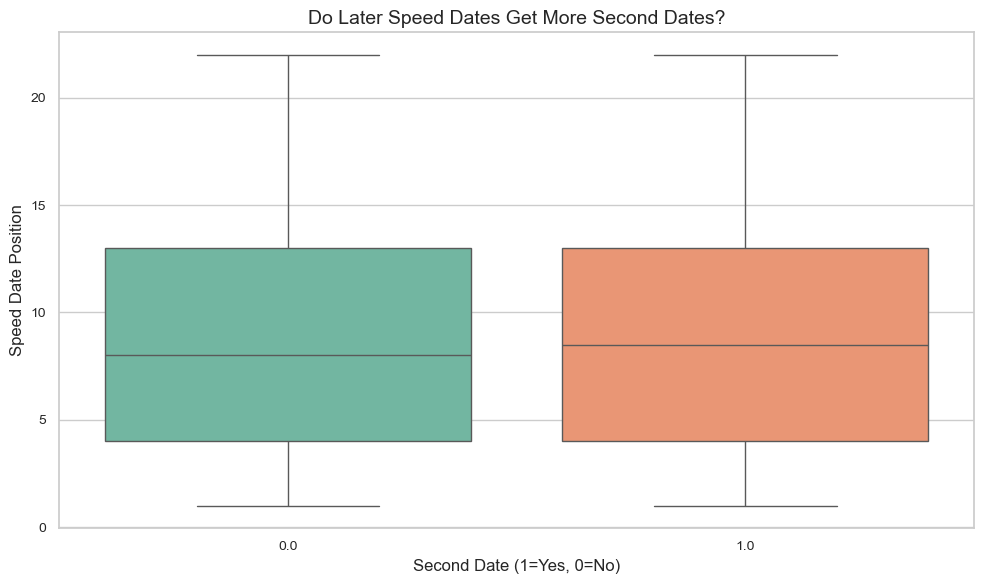

In [64]:
# Visualizing if later speed dates get more second dates with Seaborn

# Set the aesthetic style
sns.set(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Assign hue and suppress legend to avoid warning
ax = sns.boxplot(data=df, x="date_3", y="order", hue="date_3", palette="Set2", legend=False)

# Customize titles and labels
ax.set_title("Do Later Speed Dates Get More Second Dates?", fontsize=14)
ax.set_xlabel("Second Date (1=Yes, 0=No)", fontsize=12)
ax.set_ylabel("Speed Date Position", fontsize=12)

# Improve readability
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()



# 4. Conclusions and interpretations on how the statistics and visualisations are relevant to why people agree to a second date

After a thourough analysis of the speed dating data, we can draw some interesting conclusions.

While speed dating, men look mainly for attractive women, women put most attention to the intelligence in evaluating men. The least desirable attribute for men while looking for a female partner is being ambitious and women put the least attention to shared interests. However, shared interests are more important for both men and women than having the same racial background. 

So as to own value predictions compared to the notes attributed by others, both men and women tend to slightly overestimate certain attributes, like for example being sincere or fun. In terms of getting the second date, it doesn't matter whether you are the first or the last speed date on the night of the event.

Important note to be given to the Tinder marketing team
=> the physical attractivity remains crucial, but other features like the sense of humour, shared interests or intelligence can have an impact on the match rate as well.
